<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/simple_linier_regrresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

pizza = {"diameter": [6,8,10,14,18],
      "harga": [7,9,13,17.5,18]}

pizza_df = pd.DataFrame(pizza)
pizza_df
# pizza_df.shape

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


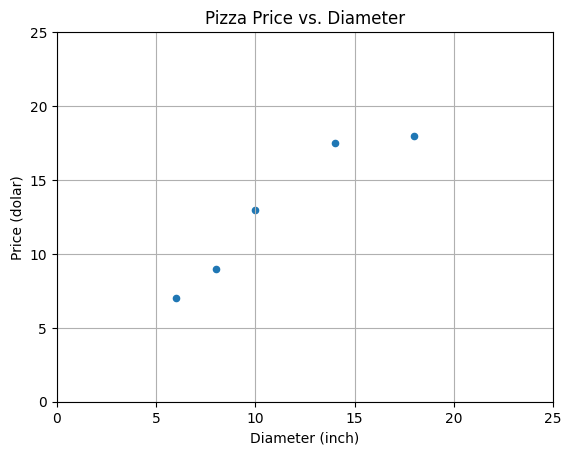

In [12]:
import matplotlib.pyplot as plt

pizza_df.plot(x="diameter", y="harga", kind="scatter")
plt.title("Pizza Price vs. Diameter")
plt.xlabel("Diameter (inch)")
plt.ylabel("Price (dolar)")
plt.xlim(0,25)
plt.ylim(0,25)
plt.grid(True)
plt.show()